In [1]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import matplotlib.pyplot as plt

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# $^{13}C$ Pocket Abundance Analysis

### Kippenhahn Diagram 2M$_{\odot}$

In [2]:
# create a kippenhahn diagram and look at later thermal pulses, solar metallicity
star3 = ms.star_log(mass=2,Z=0.02)
star3_pp = mp.se(mass=2,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Using old star.logsa file ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Searching files, please wait.......
Reading preprocessor files
File search complete.


In [4]:
# check directories where results are coming from
print(star3.sldir)
print(star3_pp.sedir)

/data/nugrid_apod2/data/set1ext/set1.2/see_wind/M2.00Z2.0e-02/LOGS
/data/nugrid_apod2/data/set1ext/set1.2/ppd_wind/M2.00Z2.0e-02/H5_out


<IPython.core.display.Javascript object>


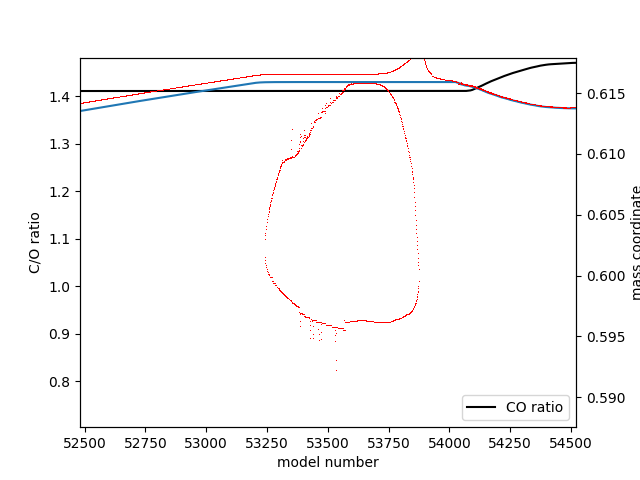

In [5]:
# create kippenhahn diagram
plt.figure(1)
star3.kippenhahn_CO(1,'model')

# focus in on evolution after third last thermal pulse
plt.ylim([0.57,0.62])
# plt.xlim([45000,51000])

# turn off legend
axis = plt.gca()
axis.get_legend().remove()

# grab the x and y limits
x_lim = axis.get_xlim()
y_lim = axis.get_ylim()

Find the $^{13}C$ pocket after the third last thermal pulse, look at late stage development before entering the He-flash driven convection zone

<IPython.core.display.Javascript object>


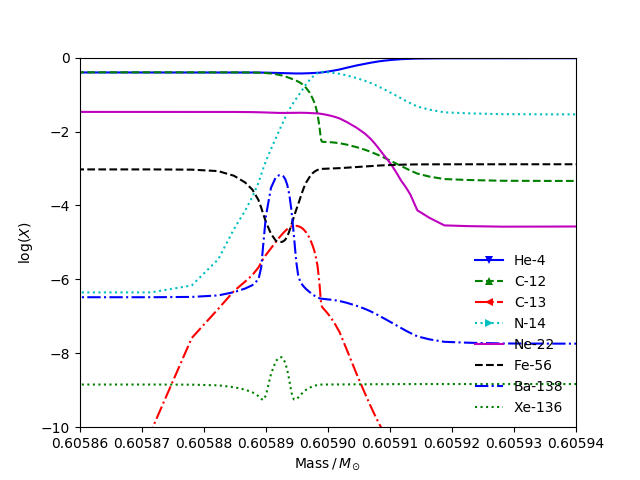

 reading ['iso_massf']...100%

In [5]:
# find the 13C pocket that forms after third last thermal pulse
pocket_num = 50100
species = ['He-4','C-12','C-13','N-14','Ne-22','Fe-56','Ba-138','Xe-136']

# create abundance plot
plt.figure(2)
star3_pp.abu_profile(isos=species,ifig=2,fname=pocket_num,logy=True)

# set mass range
plt.xlim([0.60586,0.60594])
plt.ylim([-10,0])

# grab the mass range for further analysis back in time
c13_mass_lim = plt.gca().get_xlim()

<IPython.core.display.Javascript object>


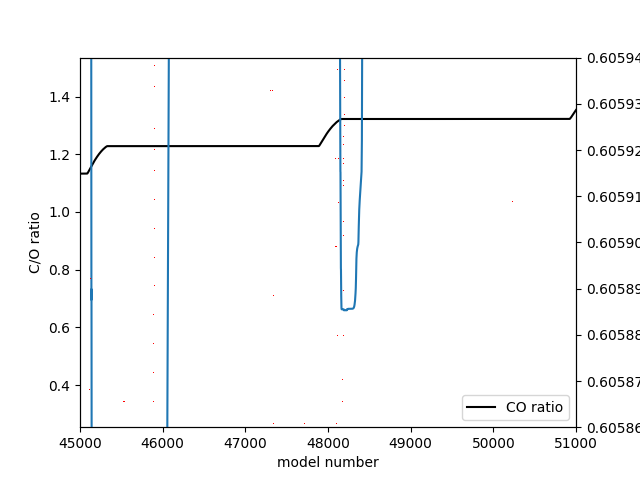

In [6]:
# create a new kippenhahn diagram with 13C pocket mass range
plt.figure(3)
star3.kippenhahn_CO(3,'model')

# set the xlimits and ylimits
plt.ylim(c13_mass_lim)
plt.xlim(x_lim)

# turn off legend
axis = plt.gca()
axis.get_legend().remove()

There is a very small portion of the non H-free core that is within the range in which the 13C pocket forms, this is the inital abundance profile that will lead to the 13C pocket. Will check to see that this contains mostly H-burning by-products from the CNO cycle (conversion of C and O to 14N) and He burning by-products

<IPython.core.display.Javascript object>


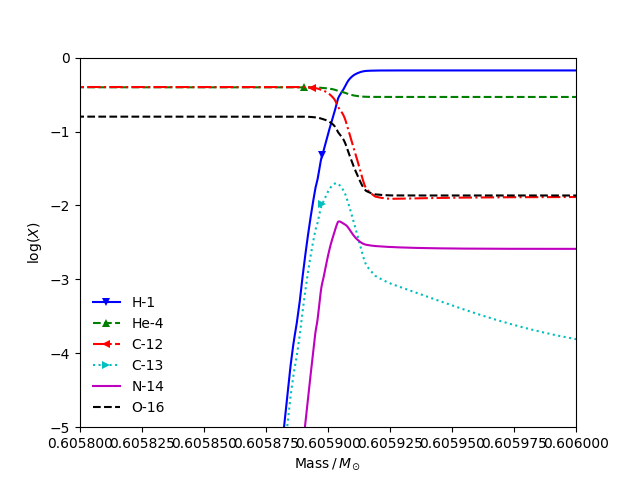

 reading ['iso_massf']...100%

(-5, 0)

In [7]:
# pocket early evolution model number
pocket_early = 48300

# look at the abundance profiles closer to surface (should be intial state)
species = ['H-1','He-4','C-12','C-13','N-14','O-16']

plt.figure(4)
star3_pp.abu_profile(isos=species,ifig=4,fname=pocket_early,logy=True)

# set xlim to initial state of star
plt.xlim([0.6058,0.606])
plt.ylim([-5,0])

There is some formation of N14 which would be seen from the CNO cycle but then it falls to very low levels (photoionization as it is very bound maybe?). The significant boost for 12C and 16O is most likely He burning which will be shown in next plot

<IPython.core.display.Javascript object>


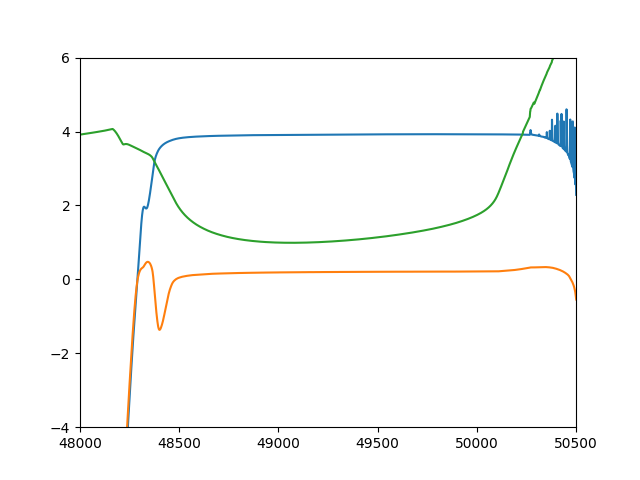

(48000, 50500)

In [8]:
# get plot of the luminosity from H and He across this
model_range = [48000,50500]

# get the data
cno = star3.get('cno')
pp = star3.get('pp')
Lhe = star3.get('log_LHe')
model_number = star3.get('model_number')

# create plot
plt.figure(7)
plt.plot(model_number,cno)
plt.plot(model_number,pp)
plt.plot(model_number,Lhe)

# ylim
plt.ylim([-4,6])
plt.xlim(model_range)

It looks like there is significant amounts of CNO cycle occuring after the recession of the H-burning shell due to the contraction after the He-flash. There is considerable amounts of He burning as well. In modelnumber 50000 there was a build up of N14 as well as C12, O16 from the He burning. Checking the effects of the He-flash convection zone

The extent of the convection zone in mass fraction is from 0.59 to 0.61. Near the bottom of the convection zone there should be high enough temperatures to form significant amounts of neutrons from the 22Ne -> 25Mg reaction allowing for another s-process to occur outside of the 13C pocket?

 reading ['mass']...100%

<IPython.core.display.Javascript object>


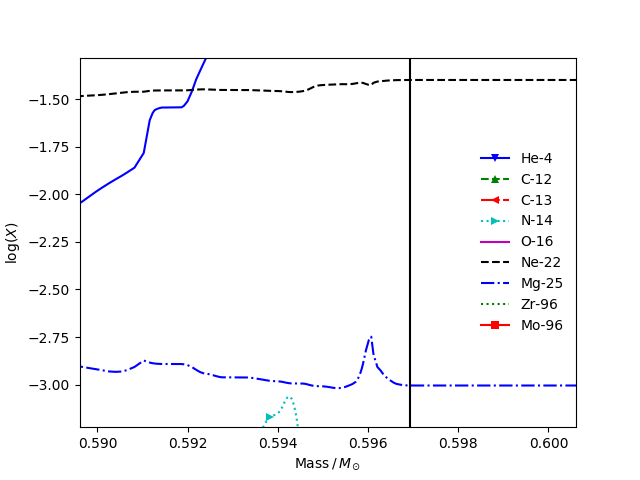

 reading ['iso_massf']...100%

(-10, 0)

In [104]:
# get abundance profile at 50000 but larger mass range
convection_num = 53840
species = ['He-4','C-12','C-13','N-14','O-16','Ne-22','Mg-25','Zr-96','Mo-96']

# get the bottom mixing zone boundary
mx_bot = star3.get('mx2_bot')[convection_num-1] * star3.get('star_mass')[convection_num-1]
mass = star3_pp.get(convection_num,'mass')

# find index
mass_index = np.argmin(abs(mx_bot - mass))

# create abundance plot
plt.figure(10)
star3_pp.abu_profile(isos=species,ifig=10,fname=convection_num,logy=True)
plt.axvline(mass[mass_index],linestyle='-',color='k')

# limits
plt.ylim([-10,0])
# plt.xlim([0.592,0.598])
# plt.xlim([0.60586,0.60594])
# plt.xlim([0.59,0.596])
#plt.xlim([0.6057,0.6060])

In [111]:
# try to see if there is a 13C pocket for a higher mass model
star6 = ms.star_log(mass=3,Z=0.02)
star6_pp = mp.se(mass=3,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 3.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...
nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 3.0
Searching files, please wait.......
Reading preprocessor files
File search complete.Closing plot_tools



<IPython.core.display.Javascript object>


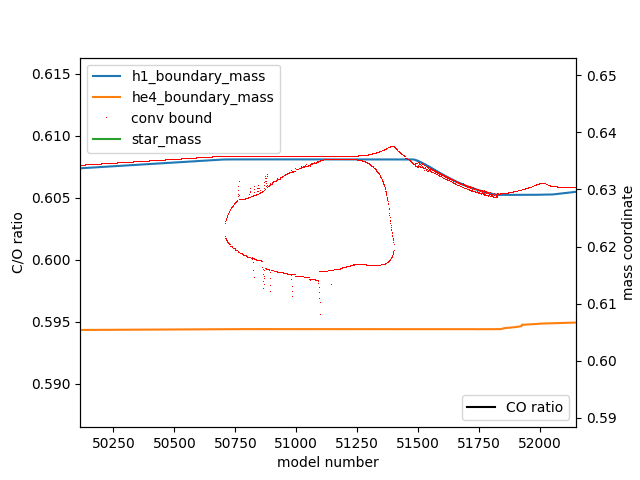

In [112]:
# create a kippenhahn diagram
plt.figure(14)
star6.kippenhahn_CO(14,'model')

In [67]:
# get a temperature plot for the bottom of the convection zone
start = 63400
end = 64100
mx_bot = star6.get('mx2_bot')[start:end]
star_mass = star6.get('star_mass')[start:end]
cycle_number = star6.get('model_number')[start:end]

index = []
for i in range(len(mx_bot)):
    if mx_bot[i] >= 1e-2:
        index.append(i)

# slice appropriately 
mx_bot = mx_bot[index[0]:(index[-1]+1)]
star_mass = star_mass[index[0]:(index[-1]+1)]
cycle_number = cycle_number[index[0]:(index[-1]+1)]

# get the cycle numbers of these indices
cycle = [start + 1 + index[0], start + 1 + index[-1]]

# grab the mass coord of each bottom convection zone
temperature_bot = []
for i in range(index[-1] + 1 - index[0]):
    mass = star6_pp.se.get(start + 1 + index[0] + i,'mass')
    temperature = star6_pp.se.get(start + 1 + index[0] + i,'temperature')
    
    # get the mass index of bottom convection zone
    mass_index = np.argmin(mass - mx_bot[i] * star_mass[i])
    temperature_bot.append(temperature[mass_index] * 1e10)

 reading ['temperature']...100%

In [80]:
# get the smallest time step in start:end
log_dt = star6.get('log_dt')[start:end]
dt_index = np.argmin(abs(np.min(log_dt) - log_dt))

print start + dt_index

63758


<IPython.core.display.Javascript object>


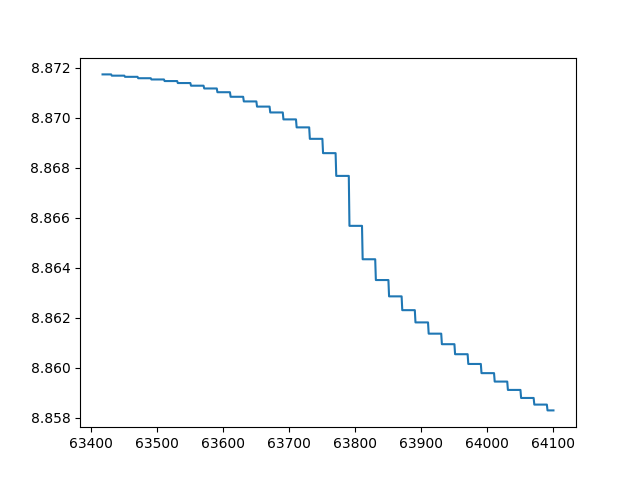

In [68]:
# make the plot as a function of cycle number
plt.figure(999)

plt.plot(cycle_number,np.log10(temperature_bot))

 reading ['mass']...100%

<IPython.core.display.Javascript object>


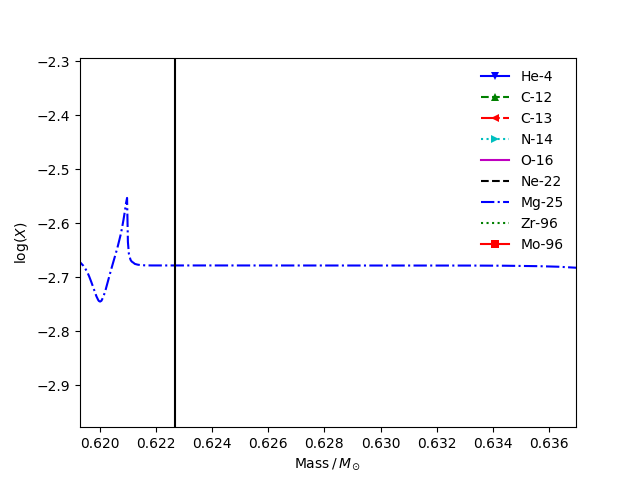

 reading ['iso_massf']...100%

(-10, 0)

In [107]:
# check for C13 pocket
pocket_num = 64110
species = ['He-4','C-12','C-13','N-14','O-16','Ne-22','Mg-25','Zr-96','Mo-96']

# get the bottom mixing zone boundary
mx_bot = star6.get('mx2_bot')[pocket_num-1] * star6.get('star_mass')[pocket_num-1]
mass = star6_pp.get(pocket_num,'mass')

# find index
mass_index = np.argmin(abs(mx_bot - mass))

# create abundance plot
plt.figure(15)
star6_pp.abu_profile(isos=species,ifig=15,fname=pocket_num,logy=True)
plt.axvline(mass[mass_index],linestyle='-',color='k')

# limits
plt.ylim([-10,0])
# plt.xlim([0.615,0.624])

In [35]:
mass_index

0

There is no C13 pocket that forms in this higher mass star during the AGB stage. There is however a similar reaction taking place but the neutrons are coming from the Ne-22 reaction instead

## Check Log Files 
Check the log files and see where there is a reasonable place to start the simulation. Estimate the time between the starting point and the He-flash convection. Possibly re-run the simulations but have more data towards the convection zone

In [8]:
# create logs object
star3_logs = ms.mesa_profile(mass=2,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
100 in profiles.index file ...
Found and load nearest profile for cycle 1
reading /data/nugrid_apod2/data/set1ext/set1.2/see_wind/M2.00Z2.0e-02/LOGS/log1.data ...
 reading ...100% 

Closing profile tool ...


In [9]:
# dictionary with the log files
logs = star3_logs.log_ind
star3_logs = ms.mesa_profile(mass=2,Z=0.02,num=46000)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
100 in profiles.index file ...
Found and load nearest profile for cycle 46000
reading /data/nugrid_apod2/data/set1ext/set1.2/see_wind/M2.00Z2.0e-02/LOGS/log52.data ...
 reading ...100% 

Closing profile tool ...


<IPython.core.display.Javascript object>


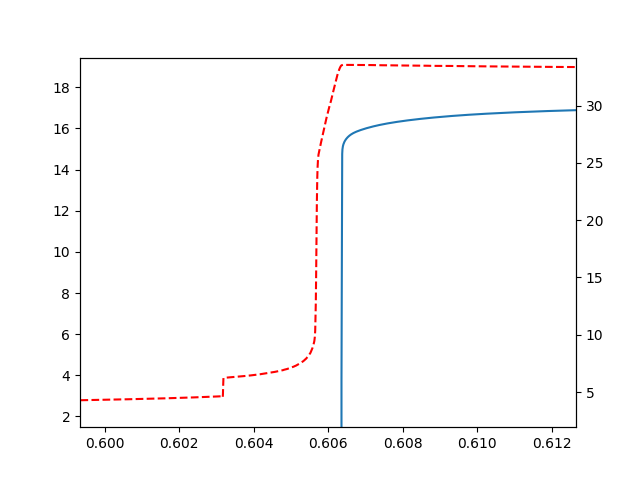

(0.5, 0.7)

In [38]:
# Get diffusion coefficient and entropy as a function of mass
diffusion = star3_logs.get('log_D_mix')
entropy = star3_logs.get('entropy')
mass = star3_logs.get('mass')

# make plot
fig = plt.figure(450)
ax1 = fig.add_subplot(111)
ax1.plot(mass,diffusion)
ax1.set_ylim([0,20])
ax1.set_xlim([0.6,0.612])

# create copy of axis for plotting entropy as well
ax2 = ax1.twinx()
ax2.plot(mass,entropy,'r--')
ax2.set_xlim([0.6,0.612])

In [44]:
# get a measure of the time between the model 46000 and the height of the convection zone
time_step = star3.get('log_dt')

# sum all time steps from 46000 to 47500
sum_time = 0
for i in range(len(time_step[45999:47500])):
    sum_time += 10**(time_step[i + 45999]

In [45]:
print 'The time between model and convection zone is', sum_time, 'years'

34276.325769399555

In [53]:
# determine the convective time scale by getting the velocity and radius of it
# need the 34000 log index for this
star3_conv = ms.mesa_profile(mass=2.0,Z=0.02,num=34000)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
100 in profiles.index file ...
Found and load nearest profile for cycle 34000
reading /data/nugrid_apod2/data/set1ext/set1.2/see_wind/M2.00Z2.0e-02/LOGS/log20.data ...
 reading ...100% 



<IPython.core.display.Javascript object>


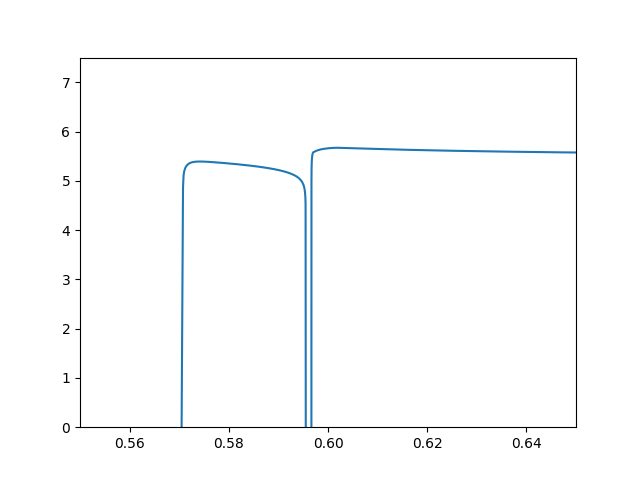

(0.55, 0.65)

In [87]:
# get the radius, mass coordinates as well as convection velocity
radius = star3_conv.get('logR')
mass = star3_conv.get('mass')
conv_velocity = star3_conv.get('log_conv_vel')

# get speed of sound and v/csound to confirm numbers
c_sound = star3_conv.get('csound')
# vc = star3_conv.get('conv_vel_div_csound')

# find the radii in which the convection zone is active
fig = plt.figure(55)
ax1 = fig.add_subplot(111)
ax1.plot(mass,conv_velocity)
ax1.set_ylim([0,7.5])
ax1.set_xlim([0.55,0.65])

# ax2 = ax1.twinx()
# ax2.plot(mass,c_sound * vc / 1e5,'r--')

In [127]:
# determine the time it takes for one FULL convective cycle
mass_index = []
for i in range(len(mass) - 1):
    if conv_velocity[i] < 0:
        mass_index.append(i)
   
# find the bounds
boundaries = []
for i in range(1,len(mass_index)):
    if mass_index[i] - mass_index[i-1] != 1:
        boundaries.append(mass_index[i-1])
        boundaries.append(mass_index[i])

    
# get the radius of convection zone and find time
r_sun = 6.95e5       # in km
radius_conv = (10**(radius[boundaries[0]]) - 10**(radius[boundaries[1]])) * r_sun

# conv time in days
conv_time = 2 * radius_conv / np.mean(conv_velocity[boundaries[0]:boundaries[1]]) / (60*60*24.)
print 'The convective time scale is', conv_time, 'in days'

The convective time scale is 0.112820257135 in days


In [128]:
radius_conv / r_sun

0.034184246599939468

In [135]:
# check the average time step in the convection zone in days
conv_model_range = [47150,47790]
avg_time = 0

for i in range(len(time_step[conv_model_range[0]:conv_model_range[1]])):
    avg_time += 10**(time_step[i + conv_model_range[0]])
    
# convert to days and average
avg_time = avg_time * (365.) * (1 / float(len(time_step[conv_model_range[0]:conv_model_range[1]])))
print 'The average time step is', avg_time, 'days'

The average time step is 70.3805874174 days


In [130]:
float(len(time_step[conv_model_range[0]:conv_model_range[1]]))

640.0

In [133]:
10**(time_step[47150])

2.4055850412301449